## Data Load

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
%matplotlib inline

In [3]:
# Read in data 

Train = np.loadtxt("train35.digits")
TrainLabel = np.loadtxt("train35.labels")
Test = np.loadtxt("test35.digits")

In [4]:
#Check the structure

Train.shape

(2000, 784)

## Perceptron

In [5]:
#Return weights and mistake

def Perceptron_Weight(train, label, runs):
    train = normalize(train)
    d = len(train[1,:]) #feature
    n = len(train[:,1]) #observation
    w=np.zeros(d)       #Initial weights
    mistake = []
    #We will use batch algorithm 
    # -
    for r in range(0,runs):    
        y = []
        for i in range(0,n):
            h = np.inner(w,train[i,:])
            if h >=0:
                y.append(1)
            else:
                y.append(-1)

            if y[i]==-1 and label[i]==1:
                w += train[i,:]
                mistake.append(1)
            elif y[i]==1 and label[i]==-1:
                w -= train[i,:]
                mistake.append(1)
            else:
                mistake.append(0)
    return w, mistake

We want to use batch algorithm instead of an online algorithm presented in past lectures.

Batch algorithm keeps the weights constant while computing the error associated with each sample in the input.

To use the perceptron as a batch algorithm, train it by simply feeding it training set M times.

The value of M should be set by cross validation.

In [6]:
def Perceptron_Perdiction(w, data):
    data = normalize(data)
    predicted = np.inner(w,data)
    Result=[]
    for i in predicted:
        if i>=0:             #1 if vx>=0
            Result.append(1)  
        else:
            Result.append(-1) #-1 if vx<0
    return Result

In [7]:
# Find error rate with the prediction and true label

def Error_rate(pred, label):
    temp = (pred != label)
    result=sum(temp)/len(pred)
    return result

## Cross validation 

In [8]:
#Crossvalidation

n = len(Train[:,1])
TrainDivide=[]
LabelDivide=[]

randomIndex=np.random.choice(n,n)
k=np.split(randomIndex,5) #devide into 5 quarters.
for i in range(0,5):
    TrainDivide.append(Train[k[i],:])
    LabelDivide.append(TrainLabel[k[i]])

For cross validation, We need to devide the training set randomly and evenly. Since there are 2000 training data, I will devide 5 sub training dataset.

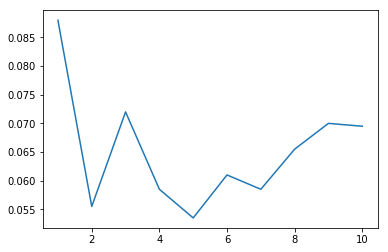

In [9]:
ErrorList = []
maxM=10

for i in range(0,maxM):   #The value of M can be expected to be less than 10.
    e = 0
    for j in range(0,5):
        RangeList=list(range(0,5))
        RangeList.pop(j)              #Except jth index to make new subtrain set.
        TempTrain=TrainDivide[RangeList[0]]
        TempLabel=LabelDivide[RangeList[0]]
        for k in range(1,len(RangeList)):
            TempTrain=np.concatenate((TempTrain,TrainDivide[RangeList[k]]))
            TempLabel=np.concatenate((TempLabel,LabelDivide[RangeList[k]]))
        
        w, m = Perceptron_Weight(TempTrain,TempLabel,i+1)   
        p = Perceptron_Perdiction(w, TrainDivide[j])
        e += Error_rate(p, LabelDivide[j])
    ErrorList.append(e/5)
    
plt.plot(range(1,len(ErrorList)+1),ErrorList)

M=(np.argsort(ErrorList)[0]+1) #Value of M from corssvalidation

Train without ith devided sample and test with ith sample for all i and get the average error rate.

For all candidate value of M, try the above process and get the value of M which computes the minimum error rate.

In [10]:
print("The result M from Cross validation is ",M)

The result M from Cross validation is  5


## Result 

In [11]:
weights, mistakes = Perceptron_Weight(Train, TrainLabel,M)
TestPrediction = Perceptron_Perdiction(weights, Test)

In [12]:
print(TestPrediction)

[-1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1]


In [13]:
#Export the result.
np.savetxt("test35_predictions_SuchanPark",TestPrediction,fmt='%10.5f')

In [14]:
#Print the plot of error

ErrorFraction = []
Cum_Error = 0
ErrorCount = []
for i in range(len(mistakes)):
    Cum_Error += mistakes[i]
    ErrorCount.append(Cum_Error)
    ErrorFraction.append(Cum_Error/(i+1))

#plt.plot(range(len(mistake)),frac)
#plt.ylim([0,0.4])

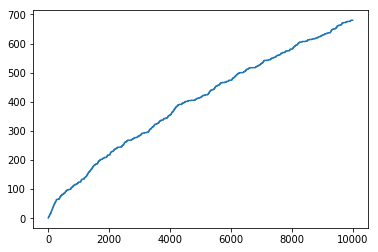

In [15]:
plt.plot(range(len(mistakes)),ErrorCount)

(6000, 10000)

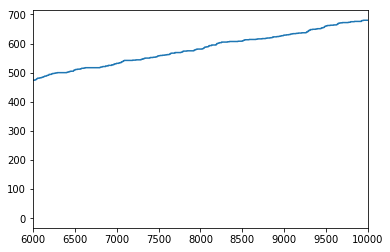

In [16]:
plt.plot(range(len(mistakes)),ErrorCount)
plt.xlim(2000*(M-2),2000*M)

From the above plots, we can find that as the number examples increases, the frequency of mistakes decreases.

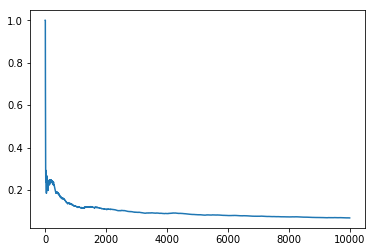

In [17]:
plt.plot(range(0,len(mistakes)),ErrorFraction)

From the above plot, we can find that total error rate significantly decreases.